In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/프로젝트 폴더/code/Sales_model/Data

/content/drive/.shortcut-targets-by-id/1fmVXXO9WkxfQqimV76GhZhDAdNd3hhtJ/프로젝트 폴더/code/Sales_model/Data


In [3]:
%ls

data_out.csv  merged.csv  model_reg.pkl  매출비교.csv


# 데이터 전처리
* 상권코드 -> 시군구코드로 변환
* 결측치 -> 일단 싹 다 drop함

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
data = pd.read_csv('merged.csv')
data = data[(data['기준년코드']==2022) & (data['기준분기코드']==4)]    # 2022년 4분기 예측용 데이터

In [6]:
# data.drop(columns = ['Unnamed: 0','기준년코드','기준분기코드'],inplace=True)
data.drop(columns = ['Unnamed: 0'],inplace=True)

In [7]:
%cd /content/drive/MyDrive/프로젝트 폴더/data/selected_data

/content/drive/.shortcut-targets-by-id/1fmVXXO9WkxfQqimV76GhZhDAdNd3hhtJ/프로젝트 폴더/data/selected_data


In [8]:
# 상권코드 -> 행정동코드
code = pd.read_csv('상권영역.csv')
code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   행정동코드   1671 non-null   int64 
 1   시군구코드   1671 non-null   int64 
 2   XCNTS   1671 non-null   int64 
 3   YDNTS   1671 non-null   int64 
 4   상권코드    1671 non-null   int64 
 5   상권코드명   1671 non-null   object
dtypes: int64(5), object(1)
memory usage: 78.5+ KB


In [9]:
data = pd.merge(data, code[['행정동코드', '상권코드']], on='상권코드', how='left')
# data.drop(columns = ['상권코드'], inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9458 entries, 0 to 9457
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   기준년코드             9458 non-null   int64  
 1   기준분기코드            9458 non-null   int64  
 2   상권코드              9458 non-null   int64  
 3   서비스업종코드명          9458 non-null   object 
 4   점포수               9458 non-null   float64
 5   유사업종점포수           9458 non-null   float64
 6   개업율               9458 non-null   float64
 7   개업점포수             9458 non-null   float64
 8   폐업율               9458 non-null   float64
 9   폐업점포수             9458 non-null   float64
 10  집객시설수             9292 non-null   float64
 11  관공서수              9292 non-null   float64
 12  은행수               9292 non-null   float64
 13  버스정거장수            9292 non-null   float64
 14  지하철수              9292 non-null   float64
 15  약국수               9292 non-null   float64
 16  총직장인구수            9458 non-null   float64


In [11]:
# 행정동코드 -> 시군구명(예 : 강남구)
name = pd.read_csv('행정동코드.csv')

In [12]:
name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   행정동코드   426 non-null    int64 
 1   시도명     426 non-null    object
 2   시군구명    426 non-null    object
 3   읍면동명    426 non-null    object
dtypes: int64(1), object(3)
memory usage: 13.4+ KB


In [13]:
data = pd.merge(data, name[['행정동코드', '시군구명']], on='행정동코드', how='left')
data.drop(columns = ['행정동코드'], inplace=True)

In [14]:
data.dropna(how="any",inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9148 entries, 0 to 9454
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   기준년코드             9148 non-null   int64  
 1   기준분기코드            9148 non-null   int64  
 2   상권코드              9148 non-null   int64  
 3   서비스업종코드명          9148 non-null   object 
 4   점포수               9148 non-null   float64
 5   유사업종점포수           9148 non-null   float64
 6   개업율               9148 non-null   float64
 7   개업점포수             9148 non-null   float64
 8   폐업율               9148 non-null   float64
 9   폐업점포수             9148 non-null   float64
 10  집객시설수             9148 non-null   float64
 11  관공서수              9148 non-null   float64
 12  은행수               9148 non-null   float64
 13  버스정거장수            9148 non-null   float64
 14  지하철수              9148 non-null   float64
 15  약국수               9148 non-null   float64
 16  총직장인구수            9148 non-null   float64


In [16]:
data.drop(columns = ['기준년코드','기준분기코드'],inplace=True)

In [17]:
data.to_csv('result.csv')

In [18]:
data.describe()

,상권코드,점포수,유사업종점포수,개업율,개업점포수,폐업율,폐업점포수,집객시설수,관공서수,은행수,...,시간대_5_생활인구_수,시간대_6_생활인구_수,월요일_생활인구_수,화요일_생활인구_수,수요일_생활인구_수,목요일_생활인구_수,금요일_생활인구_수,토요일_생활인구_수,일요일_생활인구_수,분기당매출금액
count,9.148000e+03,9148.000000,9148.000000,9148.000000,9148.000000,9148.000000,9148.000000,9148.000000,9148.000000,9148.000000,...,9.148000e+03,9148.000000,9148.000000,9.148000e+03,9.148000e+03,9.148000e+03,9.148000e+03,9148.000000,9148.000000,9.148000e+03
mean,2.108325e+06,11.106362,13.245846,3.127350,0.483603,3.544163,0.449716,27.908395,0.923918,1.621119,...,1.708951e+05,120807.044381,138853.487866,1.402720e+05,1.405466e+05,1.404134e+05,1.405195e+05,136861.524049,134574.658505,2.017687e+07
std,9.172131e+04,22.562435,25.870556,7.676473,1.234615,10.037805,1.144328,37.305336,1.363242,3.931979,...,1.631258e+05,112036.052635,125919.543482,1.286087e+05,1.290070e+05,1.289615e+05,1.296887e+05,125556.484473,122462.742249,4.093947e+07
min,1.001491e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,2.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000,3.000000,1.000000e+04
25%,2.110449e+06,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,...,6.126375e+04,40697.750000,50389.000000,5.034900e+04,5.085800e+04,5.112700e+04,5.052100e+04,48886.000000,46786.000000,4.790000e+06
50%,2.110871e+06,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,...,1.278540e+05,90312.000000,103978.000000,1.041610e+05,1.045390e+05,1.040530e+05,1.041110e+05,102384.000000,102427.000000,1.142500e+07
75%,2.120152e+06,11.000000,13.000000,2.000000,1.000000,2.000000,1.000000,31.000000,1.000000,1.000000,...,2.308800e+05,166706.000000,190624.000000,1.927660e+05,1.924270e+05,1.917410e+05,1.915150e+05,188781.000000,183325.000000,2.369250e+07
max,2.130326e+06,535.000000,602.000000,100.000000,22.000000,200.000000,21.000000,426.000000,14.000000,57.000000,...,1.408909e+06,827511.000000,941435.000000,1.038451e+06,1.038669e+06,1.045941e+06,1.062603e+06,900334.000000,934791.000000,2.080530e+09


In [19]:
data.drop(columns=['개업율', '폐업율'], inplace=True)       # 통계적 수치가 애매함함

### 은행수

<Axes: >

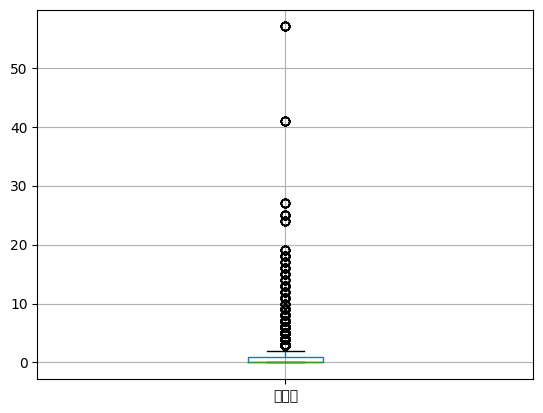

In [20]:
data.boxplot('은행수')

In [21]:
# 은행수가 5개 이상이면 2
# 은행수가 1개~5개면 1
# 은행수가 0개면 0
data['은행수'][(data['은행수']<=5) & (data['은행수']>=1)] = 1
data['은행수'][data['은행수']>=5] = 2

<Axes: >

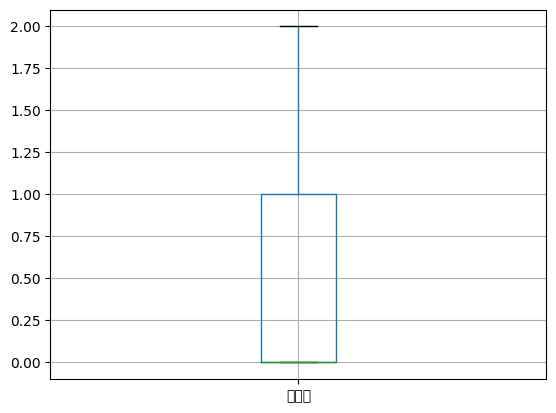

In [22]:
data.boxplot('은행수')

### 개업점포수, 폐업점포수

In [23]:
# 개업,폐업업 1개 이상이면 무조건 1
data['개업점포수'][data['개업점포수']>=1] = 1
data['폐업점포수'][data['폐업점포수']>=1] = 1

### 지하철수 : 반영을 위해 지하철수가 0인 데이터의 50%를 삭제

<Axes: >

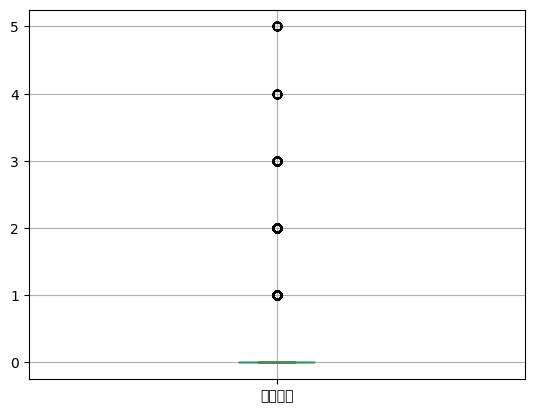

In [24]:
data.boxplot('지하철수')

In [25]:
selected_rows = data[data['지하철수'] == 0]
random_rows = selected_rows.sample(frac=0.4)
data.drop(random_rows.index, inplace=True)

### 인구수 관련 : threshold를 넘어가는 값은 모두 threshold로 대체

In [26]:
population_cols = data.filter(like='인구').columns
for pop in population_cols.tolist():
  # random drop
  selected_rows = data[data[pop] <= 1000]
  random_rows = selected_rows.sample(frac=0.2)
  data.drop(random_rows.index, inplace=True)

  # Calculate the IQR for the column(s)
  Q1 = data[pop].quantile(0.25)
  Q3 = data[pop].quantile(0.75)
  IQR = Q3 - Q1

  # Define a threshold for identifying outliers
  threshold = 1.5 * IQR

  # Remove the outliers from the dataframe
  mask = data[((data[pop] < (Q1 - threshold)) | (data[pop] > (Q3 + threshold)))].any(axis=1)

  # Change the outliers to threshold
  data[pop][data[pop]>=threshold] = threshold

In [27]:
data.iloc[:, [2, 3]].columns.tolist()

['점포수', '유사업종점포수']

### 점포수, 유사업종점포수

In [28]:
for pop in data.iloc[:, [2, 3]].columns.tolist():

  # Calculate the IQR for the column(s)
  Q1 = data[pop].quantile(0.25)
  Q3 = data[pop].quantile(0.75)
  IQR = Q3 - Q1

  # Define a threshold for identifying outliers
  threshold = 1.5 * IQR

  # Remove the outliers from the dataframe
  mask = data[((data[pop] < (Q1 - threshold)) | (data[pop] > (Q3 + threshold)))].any(axis=1)

  # Change the outliers to threshold
  data[pop][data[pop]>=threshold] = threshold

### 분기당 매출금액
* 매출이 1억 이상, 1백만원 이하 삭제
* 매출 중앙값 이하의 20% 데이터 삭제(범위 확장)

In [29]:
data['분기당매출금액'].describe()

count    5.100000e+03
mean     1.991899e+07
std      4.024248e+07
min      1.000000e+04
25%      5.170000e+06
50%      1.226000e+07
75%      2.405750e+07
max      2.080530e+09
Name: 분기당매출금액, dtype: float64

In [30]:
data['분기당매출금액'].info()

<class 'pandas.core.series.Series'>
Int64Index: 5100 entries, 1 to 9453
Series name: 분기당매출금액
Non-Null Count  Dtype  
--------------  -----  
5100 non-null   float64
dtypes: float64(1)
memory usage: 79.7 KB


In [31]:
data = data[data['분기당매출금액'] >= 1000000]
data = data[data['분기당매출금액'] <= 100000000]

In [32]:
selected_rows = data[data[pop] <= data['분기당매출금액'].median()]
random_rows = selected_rows.sample(frac=0.3)
data.drop(random_rows.index, inplace=True)

In [33]:
# Calculate the IQR for the column(s)
Q1 = data['분기당매출금액'].quantile(0.25)
Q3 = data['분기당매출금액'].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for identifying outliers
threshold = 1.5 * IQR

# Remove the outliers from the dataframe
mask = data[((data['분기당매출금액'] < (Q1 - threshold)) | (data['분기당매출금액'] > (Q3 + threshold)))].any(axis=1)

data['분기당매출금액'][data['분기당매출금액']>=threshold] = threshold

<Axes: >

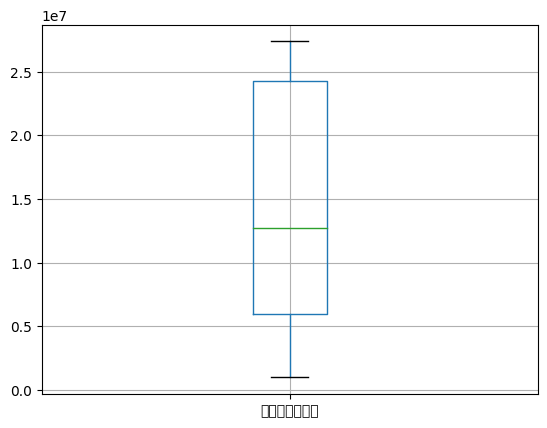

In [34]:
data.boxplot('분기당매출금액')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3344 entries, 1 to 9453
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   상권코드              3344 non-null   int64  
 1   서비스업종코드명          3344 non-null   object 
 2   점포수               3344 non-null   float64
 3   유사업종점포수           3344 non-null   float64
 4   개업점포수             3344 non-null   float64
 5   폐업점포수             3344 non-null   float64
 6   집객시설수             3344 non-null   float64
 7   관공서수              3344 non-null   float64
 8   은행수               3344 non-null   float64
 9   버스정거장수            3344 non-null   float64
 10  지하철수              3344 non-null   float64
 11  약국수               3344 non-null   float64
 12  총직장인구수            3344 non-null   float64
 13  총상주인구수            3344 non-null   float64
 14  총_생활인구_수          3344 non-null   float64
 15  남성_생활인구_수         3344 non-null   float64
 16  여성_생활인구_수         3344 non-null   float64


In [36]:
data.corrwith(data['분기당매출금액'],method='spearman')

상권코드                0.167033
점포수                 0.109951
유사업종점포수             0.111360
개업점포수               0.041320
폐업점포수               0.082322
집객시설수               0.202877
관공서수                0.142664
은행수                 0.246676
버스정거장수              0.143251
지하철수                0.191949
약국수                 0.190385
총직장인구수              0.191244
총상주인구수             -0.136590
총_생활인구_수           -0.017920
남성_생활인구_수          -0.011050
여성_생활인구_수          -0.026335
연령대_10_생활인구_수      -0.062967
연령대_20_생활인구_수       0.013128
연령대_30_생활인구_수       0.021097
연령대_40_생활인구_수       0.010485
연령대_50_생활인구_수      -0.030367
연령대_60_이상_생활인구_수   -0.073851
시간대_1_생활인구_수       -0.103168
시간대_2_생활인구_수       -0.020749
시간대_3_생활인구_수        0.038591
시간대_4_생활인구_수        0.045566
시간대_5_생활인구_수        0.014240
시간대_6_생활인구_수       -0.059352
월요일_생활인구_수         -0.017302
화요일_생활인구_수         -0.007532
수요일_생활인구_수         -0.006107
목요일_생활인구_수         -0.005067
금요일_생활인구_수         -0.006434
토요일_생활인구_수         -0.042312
일요일_생활인구_수    

In [37]:
%cd /content/drive/MyDrive/프로젝트 폴더/code/Sales_model/Data

/content/drive/.shortcut-targets-by-id/1fmVXXO9WkxfQqimV76GhZhDAdNd3hhtJ/프로젝트 폴더/code/Sales_model/Data


In [38]:
# data.to_csv('data_out.csv',encoding = 'utf-8-sig')    # 이상치 제거후
data.to_csv('result.csv',encoding = 'utf-8-sig')    # 2022년 4분기 이상치 제거후